## Health Information Systems and Decision Support Systems
## WPO 2: Data-driven systems  (23/02/24)
***
*Jakub Ceranka,Joris Wuts, Jef Vandemeulebroucke* <br>
*Department of Electronics and Informatics (ETRO)* <br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=blue>Insert students names and IDs here</font>

### Goal
The goal of this practical session is to get an insight into methods and algorithms for building knowledge-based decision-support systems. Your tasks will involve designing the systems, examining the output, tuning the parameters and validating the performance of your system against the ground-truth predictions done manually by an experienced radiologist. Students must send their notebook via Canvas Assignment functionality before the __29th of February, 2024, 23:59__. The grade from this practical session will contribute to your final grade.

### Libraries

During this practical session, the following libraries will be used.

- [__Scikit-fuzzy__](https://pypi.python.org/pypi/scikit-fuzzy): library for fuzzy sets and logic
- [__Numpy__](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html):      library used for scientific computing containing N-dimensional arrays, functions and Fourier transform.
- [__Graphviz__](https://pypi.python.org/pypi/graphviz):     Visualization of graphs. You may need to the perform installation via conda.  
- [__Matplotlib__](https://matplotlib.org/users/pyplot_tutorial.html): plotting library used for the visualization of data from python.
- [__Pgmpy__](http://pgmpy.org/): Module for building and performing inference on probabilistic graphical models


To import any external library, you need to import it using the **import** statement followed by the name of the library and the shortcut. You can additionally check for the module version using __version__ command.

Run the cell below to download all the specific packages for this lab session. Note that we can run shell code within a jupyter notebook by adding an ! mark before the line of code.
Aditionally, we are going to plot graphs in this notebook, to make them appear nicely as output of a cell, we use the **%matplotlib inline** command.

In [ ]:
!pip install scikit-fuzzy
!pip install graphviz
!pip install pgmpy
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=fe3a9e5673f5cda19fabf492147ac78b503cc70b5a147d181a30a4124e291762
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.9 MB/s eta 0:00:00


## Part 1: A fuzzy logic alert system at the pediatric ICU
At the intensive care unit of a pediatric hospital, the staff wants to implement a priority-based alert system that allows to rank the urgency of the different monitors of physiological signs of the infants. The physiological sensor outputs are combined with patient-specific information (age, history, etc,) to determine the urgency. The output of each monitor should be a value between 0 (no alert) and 100 (alert with the highest priority), allowing the output of all monitors to be ranked in terms of urgency. The responsible nurse is notified of the most urgent which needs to be addressed first.

### Task 1: Design a monitor system for body temperature
The output of a temperature sensor should be combined with the (priorly given) age of the patient. The variables to consider are:

* Temperature
   - The temperature in degrees Celcius.
       * Values of about 35,5 and below are `hypothermia`
       * Values of  roughly 37 are  `normal`
       * Values between roughly 37,5 and 38 are `elevated`
       * Values of around 38,5 indicate `mild fever`
       * Values of 39 and higher indicate `high fever`
       * Values outside of the range [30,44] are likely to indicate malfunctioning of the sensor
       
* Age
   - The age of the infant in months, from 0 to 36
       * We make a distinction between newborns (0-3 months), babies (3-6 months), infants (6-12 months) and toddlers (12-36 months)

* Alert-level
   -  A value between 0 and 100
       * Five levels are distinguished: no alert, low, moderate, high, critical


**Note that these variables are all derived from clinical practice, you might need to change them slightly( +- half a degree) to make the membership functions work properly. Ensure that the total membership at any point is always sums up to 1.**

The behaviour of the monitoring system should be the following.
* For newborns, elevated temperature should give a moderate alert, a mild fever should correspond to a high alert, and a high fever should correspond to critical alert-level.
* Babies with a mild fever should give a moderate alarm, while high fever should be high alert.
* Infants with a mild fever should be a low priority alert, and high fever should be moderate alert.
* Toddlers with a mild and high fever both should give a low alert.
* Hypothermia should always give a high alert level, except for newborns where it should be critical.
* Malfunctioning sensors should always give a moderate alert.

The alert level should evolve continuously for ages and temperatures in the correct functioning range of the sensor, and have a logical progression for values not mentioned above.

Use the packages *skfuzzy* and *matplotlib* to design and visualize a fuzzy logic controller. Instead of *%matplotlib inline* you can use *%matplotlib notebook*, which provide interactive plots.


### Step 1: Define and visualize the membership funtions
Use custom triangular and trapezoid membership functions for the temperature and age, and have at least 0.5 degree Celcius and 2 months of overlap between functions on each side, respectively. Ensure the total membership is always one. Use automatically generated membership function for the alert-level. Have a look at the examples for the syntax (http://pythonhosted.org/scikit-fuzzy/auto_examples/index.html).

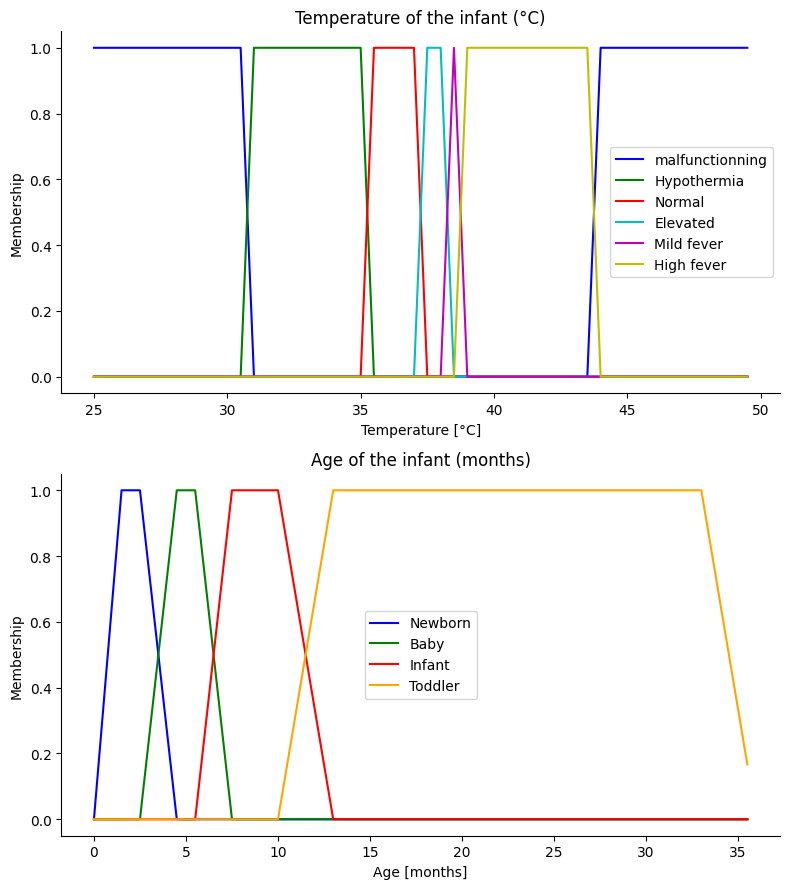

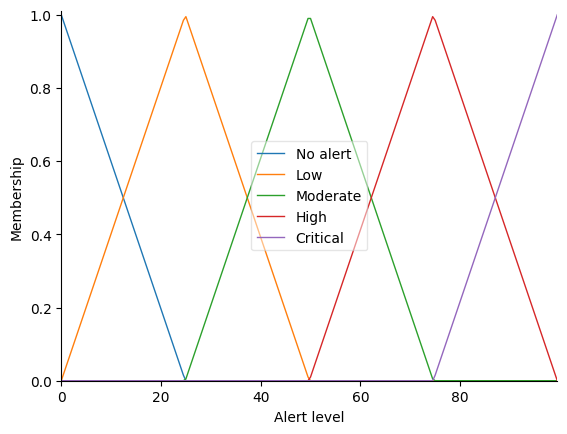

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt

# < 35,5  hypothermia
#  37 are normal
#  37,5< t < 38 elevated
# 38,5  mild fever
# >= 39 high fever

# newborns (0-3 months)
# babies (3-6 months)
# infants (6-12 months)
# toddlers (12-36 months)

month = np.arange(0, 36, 0.5)
temperature = np.arange(25, 50, 0.5)
alert_lvl = ctrl.Consequent(np.arange(0, 100, 0.5), label='Alert level')
alert_lvl.automf(5, names=['No alert','Low','Moderate', 'High', 'Critical' ]) #you can give correct lables
"""
alert_lvl['No alert'] = fuzz.trapmf(alert_lvl.universe, [0, 10, 15, 22])
alert_lvl['Low'] = fuzz.trapmf(alert_lvl.universe, [15, 22, 35, 45])
alert_lvl['Moderate'] = fuzz.trapmf(alert_lvl.universe, [35, 45, 55, 60])
alert_lvl['High'] = fuzz.trapmf(alert_lvl.universe, [55, 60, 75, 85])
alert_lvl['Critical'] = fuzz.trapmf(alert_lvl.universe, [75, 85, 100, 100])
"""
# Generate fuzzy membership functions
temp_malfuncting = fuzz.trapmf(temperature, [24, 25, 30.5, 31])
temp_hypo = fuzz.trapmf(temperature, [30.5, 31, 35, 35.5])
temp_normal = fuzz.trapmf(temperature, [35, 35.5 ,37, 37.5]) #what about values btw 35.5  ans 36.5?
temp_elevated = fuzz.trapmf(temperature, [37, 37.5, 38, 38.5])
temp_mildFever = fuzz.trimf(temperature, [38, 38.5, 39])
temp_highFever = fuzz.trapmf(temperature, [38.5, 39, 43.5, 44])
temp_malfunctioning = fuzz.trapmf(temperature, [43.5, 44, 50, 51])

month_newborn = fuzz.trapmf(month, [0, 1.5, 2.5, 4.5])
month_baby = fuzz.trapmf(month, [2.5, 4.5, 5.5, 7.5])
month_infant = fuzz.trapmf(month, [5.5, 7.5, 10, 13])
month_toddler = fuzz.trapmf(month, [10, 13, 33, 36])

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))

ax0.plot(temperature, temp_malfuncting, 'b', linewidth=1.5, label='malfunctionning')
ax0.plot(temperature, temp_malfunctioning, 'b', linewidth=1.5)
ax0.plot(temperature, temp_hypo, 'g', linewidth=1.5, label='Hypothermia')
ax0.plot(temperature, temp_normal, 'r', linewidth=1.5, label='Normal')
ax0.plot(temperature, temp_elevated, 'c', linewidth=1.5, label='Elevated')
ax0.plot(temperature, temp_mildFever, 'm', linewidth=1.5, label='Mild fever')
ax0.plot(temperature, temp_highFever, 'y', linewidth=1.5, label='High fever')
ax0.set_title('Temperature of the infant (°C)')
ax0.legend()
ax0.set_xlabel("Temperature [°C]")
ax0.set_ylabel("Membership")
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.get_xaxis().tick_bottom()
ax0.get_yaxis().tick_left()

ax1.plot(month, month_newborn, 'b', linewidth=1.5, label='Newborn')
ax1.plot(month, month_baby, 'g', linewidth=1.5, label='Baby')
ax1.plot(month, month_infant, 'r', linewidth=1.5, label='Infant')
ax1.plot(month, month_toddler, 'orange', linewidth=1.5, label='Toddler')
ax1.set_title('Age of the infant (months)')
ax1.legend()
ax1.set_xlabel("Age [months]")
ax1.set_ylabel("Membership")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
plt.tight_layout()

alert_lvl.view()

### Step 2: Define the rules
Translate the desired behaviour given above, to rules for alert levels. Start by only defining those which are given. More may be needed, after inspecting the output (Step 4).

In [ ]:
#The behaviour of the monitoring system should be the following.

## For newborns:
# hypothermia -> critical alert
#elevated temperature -> moderate alert
#mild fever -> high alert
# high fever -> critical alert-level

## Babies:
# hypothermia -> high alert
# mild fever -> moderate alarm
# high fever -> high alert

## Infants:
# hypothermia -> high alert
# mild fever -> low priority alert
# high fever ->  moderate alert

## Toddlers:
# hypothermia -> high alert
# mild and high fever -> low alert

## Malfunctioning sensors -> moderate alert

def alertsRules(age, temp):

  # We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
  age_newborn = fuzz.interp_membership(month, month_newborn, age)
  age_baby = fuzz.interp_membership(month, month_baby, age)
  age_infant = fuzz.interp_membership(month, month_infant, age)
  age_toddler = fuzz.interp_membership(month, month_toddler, age)

  temp_mal = [temp_malfuncting, temp_malfunctioning]
  temp_level_malfunctionning = fuzz.interp_membership(temperature, temp_mal, temp)
  temp_level_hypo = fuzz.interp_membership(temperature, temp_hypo, temp)
  temp_level_normal = fuzz.interp_membership(temperature, temp_normal, temp)
  temp_level_elevated = fuzz.interp_membership(temperature, temp_elevated, temp)
  temp_level_mildFever = fuzz.interp_membership(temperature, temp_mildFever, temp)
  temp_level_highFever = fuzz.interp_membership(temperature, temp_highFever, temp)


# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
#  moderate_alert = np.fmax(age_newborn, temp_level_hypo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### Step 3: Load and test the system
Make a control system by loading the rules. Now verify the output for particular inputs using the control system simulation. Output the alert level, and visualize the alert membership. __Tip:__ use the functions ctrl.ControlSystemSimulation and alert.view().


In [ ]:
#YOUR code here

### Step 4: Test the system

Make plots of the evolution of the alerts, for the following cases

    * For an age of 1 month, the alert level as a function of the temperature [28, 50] with increments of 0.5.
    * For an age of 8 months, the alert level as a function of the temperature [28, 50] with increments of 0.5.
    * For a temperature of 38.5 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.
    * For a temperature of 40 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.
    
Add rules for cases not currently covered (and which may give errors due to sparsity in the inference engine).


        

In [ ]:
#YOUR code here For an age of 1 month, the alert level as a function of the temperature [28, 50] with increments of 0.5.

In [ ]:
#YOUR code here For an age of 8 months, the alert level as a function of the temperature [28, 50] with increments of 0.5.

In [ ]:
#YOUR code here For a temperature of 38.5 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.

In [ ]:
#YOUR code here For a temperature of 40 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.

### Step 5:  Visualize the output and tune the system

Make a 3D surface plot (function ***plot_surface()***) with the output of the alert system for ages [1,36] and temperatures [28, 46]. Tune the system such that the alert level is always within the no-alert range for temperatures in the range [36.5, 37.5]. You can adjust the system by modifying the membership functions, changing the rules or inference system; till you obtain the desired behaviour. Modifications towards Step 1 are allowed here.

In [ ]:
#YOUR code here

## Part 2: A Bayesian belief network for lung cancer
In this exercise we will translate clinical knowledge into a bayesian belief network (the percentages given below are fictive). The goal is to compute the probabilities of presence of cancer, given certain information about the patient. Additionally, we wish to determine the impact on diagnostic tests, when prior information about the patient is given.

The changes for lung cancer for someone living a healthy life in a healthy surrounding are slim (3%). They are mainly influenced by smoking, being exposed to pollution, or both. This results in eleveated chances of having lung cancer of 7%, 6% and 9% respectivly. Patients over 50 (about 30% of the population) have the biggest chance of being exposed to pollution (60%), which is significantly more than patients with ages below 50 (10%). Patients over 50 are also more likely to smoke. In fact, one in four males over 50 still smokes, while only 13% of females over 50 smokes. With respect to the population with ages below 50 the difference is remarkable: 20% and 7% for males and females, respectively.  

Two tests are primarily done to determine lung cancer: an X-ray scan of the chest, and a Serum Calcium test. Lung cancer has about 85% chance of getting detected using an X-ray. In rare cases (5%), X-ray leads to a positive reading for cases where there is no tumour present. This can be verified using CT imaging. The serum calcium test is cheap, but not very reliable for lung cancer: only 70% sensitivity and a false positive result in about 35% of the negative cases.


### Step 1: Design the probalistic graphical model
Use the package graphviz to draw the bayesian belief network and visualize the network. For now, focuss on dependencies between the different criteria by establishing edges between the different nodes. You should end up with a graph of seven nodes.


In [ ]:
#YOUR code here

### Step 2: Build the probabilistic graphical model
Now use the package pgmpy to build the computational probabilistic graphical model, named cancer_model, by specifying the edges. You can verify the model you defined using the cancer_model.edges() and cancer_model.nodes() commands.

In [ ]:
#YOUR code here

### Step 3: Define the conditional probability distributions (CPDs)
Using the knowledge given above, fill in the conditional probabilities for each node using the TabularCPD command. Finding out the order of the probabilities can be a bit tricky. Have a look at http://pgmpy.org/factors.html for an example. The probability of male vs female is 50%.

In [ ]:
#YOUR code here

### Step 4: Associate the CPDs to the model structure, and test the model
Next, associate the CPDs to the model structure and check for consistency. using model.check_model().

Perform inference on you model using VariableElimination and verify the outcome is intuitively correct for all nodes (e.g. chance of cancer should increase given evidence of smoking, etc.). Adjust the definition of the CPDs if needed.

In [ ]:
#YOUR code here

### Step 5: Use your model to compute probabilities and answer questions

**5.1. Whithout any information about the patient, what are the chances of having:**
* lung cancer,
* positive X-ray
* positive serum Calcium test.

Why are they not the same?

In [ ]:
#YOUR code here

In [ ]:
## YOUR answer here

**5.2. What are the probabilities for lung cancer, the X-ray and test results  in case we have evidence about the age (>50) and smoking behaviour (smoker) of the patient? Explain the difference with the first case.**

In [ ]:
#YOUR code here

In [ ]:
## YOUR answer here

**5.3What are the probabilities for the X-ray and test results in case we have evidence of cancer (but not about the about the age and smoking behaviour of the patient)? Explain the difference with the previous cases.**  

In [ ]:
#YOUR code here

In [ ]:
## YOUR answer here

  **5.4 What are the probabilities in case we have evidence of cancer, and about the age (>50) and smoking behaviour (smoker) of the patient? Explain Your obersvation.**

In [ ]:
#YOUR code here

In [ ]:
## YOUR answer here